In [1]:
###IMPORTS###
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd



###PARAMETER AND KONSTANTS###
n_players = 200

tt=2 # figure 2,4 created for t=6
k=1 #tested rechecked with 1,2,4
n_tsteps = k*10**tt 
dt = 0.1
times = np.arange(0, n_tsteps*dt,dt)
realisations = 50 #tested with 50,100

av_rankings = np.zeros(n_players) # average ranking
N_c = int (0.5 * dt * n_players) # number of collisions in DCMS
interact = N_c

K = 1 # scaling parameter to adjust rankings
prefac = 1# \nu
store_sol = 2000

energy = np.zeros(n_tsteps)

###INITIAL DATA RANDOM und VORGEGEBEN###

mumin=4
mumax=10
sig=2#50


# import the created initial data
data = pd.read_csv('goalimpact_teamsB.csv', sep=',', index_col=False, header=None).values

rankings = np.zeros(n_players) # rankings of players
r_init = np.random.uniform(mumin,mumax,n_players) # initial rankings
overall = np.zeros((realisations, n_players)) # final rankings of all realisations

strengthi = data.copy() 

#for figure 2
theta = 11/23*strengthi.sum(axis=1)

#for figure 4
theta= np.random.uniform(mumin,mumax,n_players)
sig=1;

In [2]:
###DeFINITION FUNCTIONS###
def coll_step(ratings, theta, coll_pairs, K, prefac):

    nel = coll_pairs.size
    interactions = 0.5 * nel
    Sij = np.array([-1.0,1.0]) # score of the game

    for k in np.arange(0,interactions,dtype=int):

        k1 = coll_pairs[k]
        k2 = coll_pairs[nel-1-k]
        diff_ranking = rankings[k1] - rankings[k2]

        #for e.g. figure 4
        diff_strength = (np.random.normal(theta[k1], sig**2, 1)-np.random.normal(theta[k2], sig**2, 1))[0]

        #for figure 2 and the goalimpact data  
        #diff_strength = np.sum(np.random.choice(strengthi[k1], 11, replace=False, p=None))-np.sum(np.random.choice(strengthi[k2], 11, replace=False, p=None))

        b = np.tanh(-prefac * diff_strength)
        b1 = np.tanh(prefac * diff_ranking)

        prob = np.array([0.5 * (b+1.0), 0.5 * (-b + 1.0)])
        outcome = np.random.choice(Sij, p = prob) # outcome of the game, depending on the difference in strength

        # Change in rankings
        rankings[k1] = rankings[k1] + K * (outcome - b1)
        rankings[k2] = rankings[k2] + K * (-outcome + b1)

        
def birds(n_players, n_tsteps, rankings, overall, energy, N_c, realisations, store_sol, K, prefac):

    collision_pairs = np.zeros(2 * N_c)

    for r in np.arange(0,realisations,dtype=int):

        rankings[:] = r_init[:]
        av_rankings = np.zeros(n_players)

        for t in np.arange(n_tsteps, dtype=int):

            collision_pairs = np.random.choice(n_players, 2*N_c, replace=False)
            coll_step(rankings, theta,  collision_pairs, K, prefac)
            energy[t] = np.sum((rankings-theta)**2)/n_players
            if(t > n_tsteps - store_sol):
                av_rankings[:] = av_rankings[:] + rankings[:]

        overall[r,:] = av_rankings[:]/store_sol

        


Text(0, 0.5, 'Ranking')

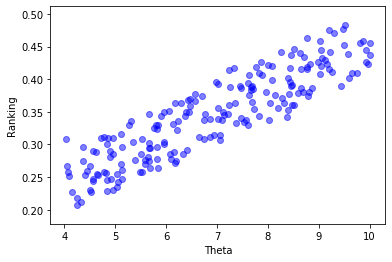

In [3]:
###RUN ITSELF###
#n_tsteps = 10 # does everything work out?
birds(n_players, n_tsteps, rankings, overall, energy, N_c, realisations, store_sol, K, prefac)
r_av_real = np.sum(overall,0)/realisations



###EXPORT RESULTS###
filename = 'export_DATA'
np.savez_compressed(filename, n_tsteps=n_tsteps, energy=energy, realisations=realisations, rankings=rankings, theta=theta, strengthi=strengthi, r_av_real=r_av_real, collissions=interact, mumin=mumin, mumax=mumax, sig=sig)

###see the result###
plt.figure(1)
plt.scatter(theta, r_av_real,c = 'b', alpha=0.5)
plt.xlabel('Theta')
plt.ylabel('Ranking')
